# ***tutto***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5277,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5278,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5279,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5280,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


1. visualizzare il numero totale di record presenti nel file


In [ ]:
df['area'].count()

5282

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente


In [ ]:
ReScelta=input()

df.loc[df['nome_area']==ReScelta,'area'].count()


Veneto


191

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente


In [ ]:
ReScelta=input()

if df.loc[df['nome_area']==ReScelta,'area'].count() >= 1:
  print(df.loc[df['nome_area']==ReScelta,'area'].count())
else:
 print('la regione scelta non esiste')


Veneto
191


4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente


In [ ]:
ReScelta=input('Inserisci Una Regione')
df.loc[df['nome_area']==ReScelta,'numero_dosi'].count()


Inserisci Una RegioneVeneto


191

5. visualizzare il numero di vaccini per ogni fornitore


In [ ]:
                                       # x ogni=groupby
df.groupby('fornitore')



df.groupby('fornitore')['numero_dosi'].sum() 




fornitore
Janssen                     1846104
Moderna                    15235939
Pfizer/BioNTech            71327408
Vaxzevria (AstraZeneca)    11544590
Name: numero_dosi, dtype: int64

6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini

In [ ]:
regione=input()

data=df.groupby(['nome_area','fornitore'],as_index=False).sum().sort_values('numero_dosi',ascending=False)
data[data['nome_area']==regione]

Veneto


,nome_area,fornitore,numero_dosi,codice_regione_ISTAT
82,Veneto,Pfizer/BioNTech,5778279,375
81,Veneto,Moderna,1278314,175
83,Veneto,Vaxzevria (AstraZeneca),929079,340
80,Veneto,Janssen,103000,65


7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre


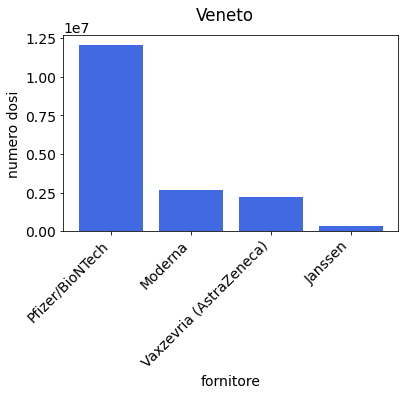

In [ ]:
fig = plt.figure()              
ax = plt.axes()     


ax.bar(data['fornitore'],data['numero_dosi'],color='Royalblue') #prima x e poi y
fig.autofmt_xdate(rotation=45)
ax.set_xlabel('fornitore')
ax.set_ylabel('numero dosi')



fig.suptitle(regione)
plt.show()

8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta


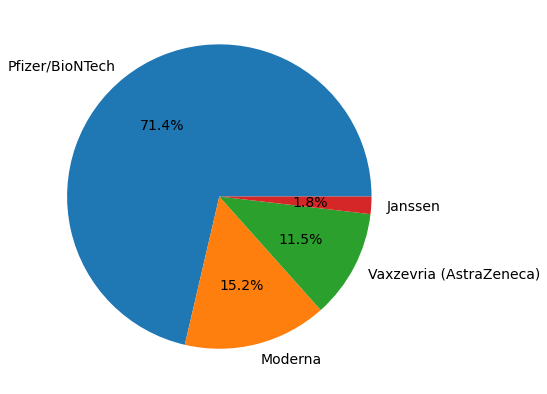

In [ ]:
data=df.groupby(['fornitore'],as_index=False).sum().sort_values('numero_dosi',ascending=False)
fig = plt.figure(figsize=[7,7])
ax = plt.axes()
ax.pie(data['numero_dosi'], labels=data['fornitore'], autopct='%1.1f%%')

plt.show()

9. visualizzare le informazioni dell'esercizio 6 con un grafico treemap


<function matplotlib.pyplot.show>

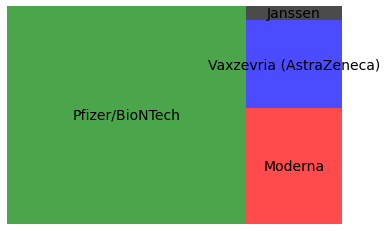

In [ ]:
!pip install squarify
import squarify

color_list=['g','r','b','k','c','y']
plt.rc('font',size=14)
squarify.plot(sizes=data['numero_dosi'],label=data['fornitore'],color=color_list,alpha=0.7)
plt.axis('off')

plt.show

10. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini


In [ ]:
df.groupby(['nome_area'],as_index=False).agg({'numero_dosi':sum }).sort_values('numero_dosi',ascending=False).head(3) 
#as_index=False    spunta la loro vera posizione nel df 




,nome_area,numero_dosi
8,Lombardia,17274689
6,Lazio,10332808
3,Campania,9179717


11. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media


In [ ]:

data=df.groupby(['nome_area'],as_index=False).agg({'numero_dosi':sum })


data.loc[data['numero_dosi'] < data['numero_dosi'].mean(),['nome_area']]


,nome_area
0,Abruzzo
1,Basilicata
2,Calabria
5,Friuli-Venezia Giulia
7,Liguria
9,Marche
10,Molise
12,Provincia Autonoma Bolzano / Bozen
13,Provincia Autonoma Trento
15,Sardegna


12. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico

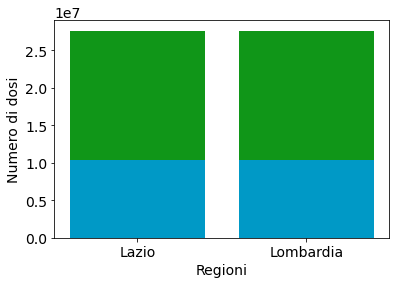

In [ ]:
import datetime
from dateutil.relativedelta import *
now=datetime.datetime.now()


df['date'] = pd.to_datetime(df['data_consegna']).dt.date


def calctime(t):
  
 t = datetime.datetime.strptime(str(t), '%Y-%m-%d')

 past=datetime.datetime.now() - relativedelta(month=6)

 return past<t



gb = df['date'].apply(calctime)
df[gb.values == True]

# fig = plt.figure()
# ax = plt.axes()

# labels = ['Lazio', 'Lombardia']
# data=df.groupby('nome_area').agg({'numero_dosi':sum })
# ax.bar(labels,data.loc['Lazio', 'numero_dosi'],label='Lazio', color='#0099c6')
# ax.bar(labels,data.loc['Lombardia', 'numero_dosi'],label='Lombardia', color='#109618',bottom=data.loc['Lazio', 'numero_dosi'])



# ax.set_xlabel('Regioni')
# ax.set_ylabel('Numero di dosi')


# plt.show()
















